In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization
import os
import random
import time

In [4]:
import pandas as pd
import numpy as np
import os

dataset_dir  = '/content/drive/MyDrive/BCI/npy_dataset'

eeg_data = []
labels = []
for file in os.listdir(dataset_dir):
    if file.endswith(".npy"):
        data = np.load(os.path.join(dataset_dir,file), allow_pickle=True)
        eeg_data.append(data)
        labels.append(file.split("-")[0])

print(len(eeg_data))
print(len(labels))

2700
2700


In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(labels)
y = encoder.transform(labels)
Y = np_utils.to_categorical(y, 6)

In [6]:
print(Y[3])

[0. 1. 0. 0. 0. 0.]


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

for i in range(len(eeg_data)):
    scaler = StandardScaler()
    scaler.fit(eeg_data[i])
    eeg_data[i] = scaler.transform(eeg_data[i])

print(eeg_data)
print(len(labels))

[array([[-0.28747389, -0.60160176, -0.25751515, -0.63695974],
       [-1.15202857, -1.41930384,  1.30410609,  0.00292675],
       [-0.78596597, -1.02246474,  1.10530321, -0.22145823],
       ...,
       [-0.61158181, -0.59626311,  0.52259298,  0.69767076],
       [-0.7979759 , -0.76472694,  0.74879273,  1.21828637],
       [ 0.22655103,  0.18822075, -0.42786745,  0.70368739]]), array([[-0.59747505, -0.654136  ,  0.42069112,  1.6849573 ],
       [ 1.07691073,  0.77350063, -0.9002088 ,  1.84077059],
       [ 1.34460054,  0.27517074, -1.29953331,  0.10901714],
       ...,
       [-0.38204206, -0.29519523,  0.49519196, -1.46024531],
       [-1.25123925, -0.46819201,  1.47189799,  0.24257139],
       [-0.80900683,  0.39086922,  0.68069906,  0.86471161]]), array([[-0.36787712,  1.73450963, -1.59535313,  1.32260161],
       [-1.41287997,  0.76169568, -0.19503544, -0.70217993],
       [-0.0085143 ,  0.70392543,  1.2416251 , -1.13535763],
       ...,
       [ 1.09217279, -0.97837219, -0.1806561

In [8]:
print(eeg_data[0])

[[-0.28747389 -0.60160176 -0.25751515 -0.63695974]
 [-1.15202857 -1.41930384  1.30410609  0.00292675]
 [-0.78596597 -1.02246474  1.10530321 -0.22145823]
 ...
 [-0.61158181 -0.59626311  0.52259298  0.69767076]
 [-0.7979759  -0.76472694  0.74879273  1.21828637]
 [ 0.22655103  0.18822075 -0.42786745  0.70368739]]


In [9]:
from sklearn.model_selection import train_test_split
import numpy

data = numpy.array(eeg_data)  #convert array to numpy type array

X_train, X_test, y_train, y_test  = train_test_split(data,Y,test_size=0.2)  

In [10]:
print(len(X_train))
print(len(X_test))

2160
540


In [11]:
print(len(y_train))
print(len(y_test))

2160
540


In [12]:
train_X = np.array(X_train)
test_X = np.array(X_test)

train_y = np.array(y_train)
test_y = np.array(y_test)

In [13]:
train_y[0]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [14]:
print(train_X.shape[1:])

(256, 4)


In [15]:
print(test_y)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [16]:
model = Sequential()

# model.add(Conv1D(64, (3), input_shape=train_X.shape[1:]))
# model.add(Activation('relu'))

# model.add(Conv1D(64, (2)))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=(2)))

# model.add(Conv1D(64, (2)))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=(2)))

# model.add(Flatten())

# model.add(Dense(512))

# model.add(Dense(6))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])


model.add(Conv1D(64, (5), input_shape=train_X.shape[1:]))
model.add(Activation('relu'))

model.add(Conv1D(128, (2)))
model.add(Activation('relu'))

model.add(Conv1D(128, (2)))
model.add(Activation('relu'))

model.add(Conv1D(64, (2)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(64, (2)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

# model.add(Dense(512))
# model.add(Dense(256))
# model.add(Dense(128))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model.add(Conv1D(512, (3), input_shape=train_X.shape[1:]))
# model.add(Activation('relu'))

# model.add(Conv1D(256, (2)))
# model.add(Activation('relu'))

# model.add(Conv1D(128, (2)))
# model.add(Activation('relu'))

# model.add(Conv1D(128, (2)))
# model.add(Activation('relu'))

# model.add(Conv1D(64, (2)))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=(2)))

# model.add(Conv1D(64, (2)))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=(2)))

# model.add(Flatten())

# model.add(Dense(512))
# model.add(Dense(256))
# model.add(Dense(128))

# model.add(Dense(6))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [34]:
history = model.fit(train_X, train_y, epochs=100, batch_size=32)

Epoch 1/100
68/68 [==============================] - 7s 104ms/step - loss: 0.0391 - accuracy: 0.9921
Epoch 2/100
68/68 [==============================] - 7s 104ms/step - loss: 0.0592 - accuracy: 0.9769
Epoch 3/100
68/68 [==============================] - 7s 100ms/step - loss: 0.1015 - accuracy: 0.9708
Epoch 4/100
68/68 [==============================] - 7s 101ms/step - loss: 0.0292 - accuracy: 0.9921
Epoch 5/100
68/68 [==============================] - 7s 98ms/step - loss: 0.0105 - accuracy: 0.9977
Epoch 6/100
68/68 [==============================] - 7s 99ms/step - loss: 0.0070 - accuracy: 0.9981
Epoch 7/100
68/68 [==============================] - 7s 98ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 8/100
68/68 [==============================] - 8s 118ms/step - loss: 0.0017 - accuracy: 0.9991
Epoch 9/100
68/68 [==============================] - 7s 98ms/step - loss: 0.0019 - accuracy: 0.9991
Epoch 10/100
68/68 [==============================] - 7s 99ms/step - loss: 0.0054 - accuracy: 0

In [35]:
score = model.evaluate(test_X, test_y, batch_size=32)
print(score)


17/17 [==============================] - 1s 29ms/step - loss: 6.5108 - accuracy: 0.4519
[6.510762691497803, 0.45185184478759766]


In [36]:
#Predict
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(test_X)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(test_y, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
y_prediction

17/17 [==============================] - 1s 29ms/step


array([0, 1, 0, 0, 0, 4, 0, 0, 1, 3, 5, 3, 0, 4, 4, 1, 3, 0, 2, 2, 1, 3,
       1, 2, 0, 1, 2, 1, 5, 1, 1, 1, 3, 0, 2, 0, 0, 5, 5, 4, 4, 1, 0, 2,
       5, 3, 1, 3, 0, 3, 3, 3, 1, 0, 4, 4, 4, 5, 1, 3, 0, 5, 3, 2, 0, 0,
       5, 2, 0, 0, 5, 4, 2, 0, 0, 2, 0, 3, 5, 4, 0, 1, 5, 0, 2, 3, 1, 4,
       2, 3, 5, 1, 1, 2, 5, 0, 1, 3, 0, 5, 2, 3, 3, 1, 4, 2, 3, 4, 4, 0,
       2, 2, 4, 1, 2, 4, 4, 2, 0, 2, 5, 2, 2, 0, 3, 3, 5, 2, 5, 5, 4, 1,
       0, 1, 4, 5, 3, 2, 5, 2, 2, 5, 0, 3, 1, 4, 4, 4, 4, 0, 3, 0, 4, 3,
       4, 2, 4, 2, 1, 5, 5, 4, 0, 5, 3, 3, 4, 4, 5, 2, 3, 2, 5, 3, 4, 4,
       0, 3, 0, 1, 0, 0, 1, 3, 1, 5, 2, 1, 4, 2, 4, 4, 3, 5, 5, 5, 3, 3,
       5, 0, 0, 4, 2, 2, 1, 4, 0, 0, 4, 4, 1, 1, 3, 2, 4, 1, 4, 4, 3, 0,
       4, 5, 0, 4, 4, 5, 3, 0, 4, 4, 3, 5, 1, 5, 1, 3, 4, 2, 2, 4, 3, 1,
       4, 5, 5, 1, 0, 3, 4, 2, 3, 2, 5, 3, 1, 2, 4, 0, 1, 3, 0, 4, 0, 0,
       5, 5, 5, 0, 4, 2, 2, 2, 1, 4, 4, 1, 0, 3, 0, 0, 5, 5, 0, 5, 2, 2,
       0, 2, 4, 5, 4, 0, 2, 1, 4, 4, 0, 4, 2, 2, 4,

17/17 [==============================] - 1s 29ms/step


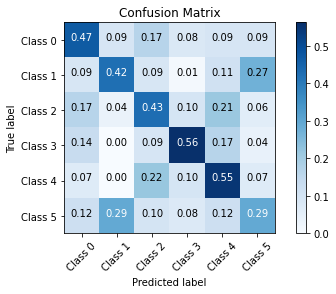

In [37]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Example multi-class data
y_true = [1, 2, 0, 2, 1, 1, 2, 0, 1, 0]
y_pred = [1, 1, 0, 2, 1, 2, 2, 0, 1, 0]

y_prediction = model.predict(test_X)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(test_y, axis=1)

# Number of classes
num_classes = len(np.unique(y_test))

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_prediction)

# Normalize the confusion matrix
confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]

# Create the plot
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ["Class {}".format(i) for i in range(num_classes)], rotation=45)
plt.yticks(tick_marks, ["Class {}".format(i) for i in range(num_classes)])

# Add values to the plot
thresh = confusion_mat.max() / 2.
for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
    plt.text(j, i, format(confusion_mat[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if confusion_mat[i, j] > thresh else "black")

# Add labels and adjust layout
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

[[0.46391753 0.11111111 0.16842105 0.09411765 0.08571429 0.11688312]
 [0.09278351 0.51851852 0.09473684 0.01176471 0.1047619  0.35064935]
 [0.1443299  0.03703704 0.37894737 0.09411765 0.17142857 0.06493506]
 [0.13402062 0.         0.09473684 0.63529412 0.15238095 0.05194805]
 [0.05154639 0.         0.16842105 0.08235294 0.38095238 0.06493506]
 [0.11340206 0.33333333 0.09473684 0.08235294 0.1047619  0.35064935]]


In [39]:
import pickle
pickle.dump(model, open("44-acc-cnn-model.sav", 'wb'))

In [40]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 252, 64)           1344      
                                                                 
 activation (Activation)     (None, 252, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 251, 128)          16512     
                                                                 
 activation_1 (Activation)   (None, 251, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 128)          32896     
                                                                 
 activation_2 (Activation)   (None, 250, 128)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 249, 64)           1

KeyError: ignored

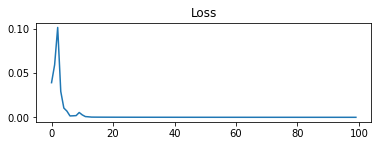

In [43]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()